<a href="https://colab.research.google.com/github/belovelace/AI-study/blob/main/UCI_HAR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HAR 데이터 가설

## 실험 조건

스마트폰 위치: 허리 왼쪽 (벨트 위치)
<br>
축 방향: x(좌우), y(앞뒤), z(상하)

## 동적 활동 예측
### 1. 걷기 vs 뛰기

주요 차이 축: y축(앞뒤) + z축(상하)
<br>
이유: 뛸 때 충격이 크고 보폭이 커져서

### 2. 계단 오르기

주요 특징 축: z축(상하) + y축(앞뒤)
<br>
이유: 높이 변화와 앞으로 나아가는 움직임

##  정적 활동 예측
### 3. 앉기 vs 서기 vs 누워있기
### 주요 구분 축: z축(상하)
이유: 중력 방향이 각 자세마다 다르게 작용
<br>
서기: z축 방향으로 중력 작용
<br>
앉기: 허리 기울어져서 중력 방향 변화
<br>
누워있기: 중력이 x축이나 y축 방향으로 작용

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
# 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data_path = '/content/drive/MyDrive/AI_study/UCI HAR Dataset/'

print("현재 파일들:")
print(os.listdir(data_path))

현재 파일들:
['.DS_Store', 'README.txt', 'features_info.txt', 'features.txt', 'activity_labels.txt', 'test', 'train']


In [15]:
# train 폴더 안 확인
print("train 폴더:")
print(os.listdir(data_path + 'train/'))
print()

# test 폴더 안 확인
print("test 폴더:")
print(os.listdir(data_path + 'test/'))

train 폴더:
['subject_train.txt', 'y_train.txt', 'X_train.txt', 'Inertial Signals']

test 폴더:
['y_test.txt', 'subject_test.txt', 'X_test.txt', 'Inertial Signals']


In [16]:
# train 폴더 안 확인
print("train 폴더:")
print(os.listdir(data_path + 'train/'))
print()

# test 폴더 안 확인
print("test 폴더:")
print(os.listdir(data_path + 'test/'))

train 폴더:
['subject_train.txt', 'y_train.txt', 'X_train.txt', 'Inertial Signals']

test 폴더:
['y_test.txt', 'subject_test.txt', 'X_test.txt', 'Inertial Signals']


In [17]:
# Inertial Signals 폴더 안 확인
print("train/Inertial Signals 폴더:")
print(os.listdir(data_path + 'train/Inertial Signals/'))

train/Inertial Signals 폴더:
['body_acc_x_train.txt', 'body_acc_y_train.txt', 'total_acc_z_train.txt', 'body_gyro_x_train.txt', 'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'body_gyro_y_train.txt', 'total_acc_x_train.txt', 'total_acc_y_train.txt']


In [18]:
print("y_train.txt 앞부분:")
y_train = pd.read_csv(data_path + 'train/y_train.txt', header=None)
print(y_train.head())
print(f"라벨 종류: {y_train[0].unique()}")

y_train.txt 앞부분:
   0
0  5
1  5
2  5
3  5
4  5
라벨 종류: [5 4 6 1 3 2]


# 1단계: 걷기 vs 계단 오르기 데이터 로딩

In [19]:
# 걷기(1)와 계단 오르기(2) 샘플 찾기
walking_indices = y_train[y_train[0] == 1].index
upstairs_indices = y_train[y_train[0] == 2].index

print(f"걷기 샘플 개수: {len(walking_indices)}")
print(f"계단 오르기 샘플 개수: {len(upstairs_indices)}")
print(f"첫 번째 걷기 샘플 인덱스: {walking_indices[0]}")
print(f"첫 번째 계단 오르기 샘플 인덱스: {upstairs_indices[0]}")

걷기 샘플 개수: 1226
계단 오르기 샘플 개수: 1073
첫 번째 걷기 샘플 인덱스: 78
첫 번째 계단 오르기 샘플 인덱스: 150


In [21]:
# body_acc 데이터 로딩 (움직임만, 중력 제외)
body_acc_x = pd.read_csv(data_path + 'train/Inertial Signals/body_acc_x_train.txt',
                         header=None, delim_whitespace=True)
body_acc_y = pd.read_csv(data_path + 'train/Inertial Signals/body_acc_y_train.txt',
                         header=None, delim_whitespace=True)
body_acc_z = pd.read_csv(data_path + 'train/Inertial Signals/body_acc_z_train.txt',
                         header=None, delim_whitespace=True)

print("데이터 shape:")
print(f"x축: {body_acc_x.shape}")
print(f"y축: {body_acc_y.shape}")
print(f"z축: {body_acc_z.shape}")

# 첫 번째 걷기 샘플 확인
walking_sample_idx = walking_indices[0]
print(f"\n걷기 샘플 (인덱스 {walking_sample_idx}):")
print(f"x축 첫 10개 값: {body_acc_x.iloc[walking_sample_idx, :10].values}")

/tmp/ipython-input-419992848.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_x = pd.read_csv(data_path + 'train/Inertial Signals/body_acc_x_train.txt',
/tmp/ipython-input-419992848.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_y = pd.read_csv(data_path + 'train/Inertial Signals/body_acc_y_train.txt',
/tmp/ipython-input-419992848.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_z = pd.read_csv(data_path + 'train/Inertial Signals/body_acc_z_train.txt',


데이터 shape:
x축: (7352, 128)
y축: (7352, 128)
z축: (7352, 128)

걷기 샘플 (인덱스 78):
x축 첫 10개 값: [ 0.3767984   0.3820639   0.119208   -0.2899142  -0.3154718  -0.08307199
  0.0232823   0.00953036 -0.05062241 -0.06971416]


### 데이터 로딩 중 오류
원인:

- sep=' '는 정확히 하나의 공백만 구분자로 인식
- 실제 데이터에는 여러 개의 연속된 공백이 있었음
- 그래서 열 개수가 맞지 않아서 오류 발생

해결책:

- delim_whitespace=True 또는 sep='\s+' 사용
- 이렇게 하면 모든 종류의 공백을 구분자로 처리

In [22]:
import matplotlib.pyplot as plt

# 걷기와 계단 오르기 샘플 가져오기
walking_idx = walking_indices[0]  # 78
upstairs_idx = upstairs_indices[0]  # 150

# 각 축별 데이터 추출
walking_x = body_acc_x.iloc[walking_idx].values
walking_y = body_acc_y.iloc[walking_idx].values
walking_z = body_acc_z.iloc[walking_idx].values

upstairs_x = body_acc_x.iloc[upstairs_idx].values
upstairs_y = body_acc_y.iloc[upstairs_idx].values
upstairs_z = body_acc_z.iloc[upstairs_idx].values

print("데이터 확인:")
print(f"걷기 y축 범위: {walking_y.min():.3f} ~ {walking_y.max():.3f}")
print(f"계단 y축 범위: {upstairs_y.min():.3f} ~ {upstairs_y.max():.3f}")

데이터 확인:
걷기 y축 범위: -0.431 ~ 0.235
계단 y축 범위: -0.462 ~ 0.264


In [23]:
print("z축(상하) 비교:")
print(f"걷기 z축 범위: {walking_z.min():.3f} ~ {walking_z.max():.3f}")
print(f"계단 z축 범위: {upstairs_z.min():.3f} ~ {upstairs_z.max():.3f}")

# 범위 계산
walking_y_range = walking_y.max() - walking_y.min()
upstairs_y_range = upstairs_y.max() - upstairs_y.min()
walking_z_range = walking_z.max() - walking_z.min()
upstairs_z_range = upstairs_z.max() - upstairs_z.min()

print(f"\n범위 비교:")
print(f"y축 - 걷기: {walking_y_range:.3f}, 계단: {upstairs_y_range:.3f}")
print(f"z축 - 걷기: {walking_z_range:.3f}, 계단: {upstairs_z_range:.3f}")

z축(상하) 비교:
걷기 z축 범위: -0.329 ~ 0.411
계단 z축 범위: -0.358 ~ 0.387

범위 비교:
y축 - 걷기: 0.666, 계단: 0.726
z축 - 걷기: 0.740, 계단: 0.745


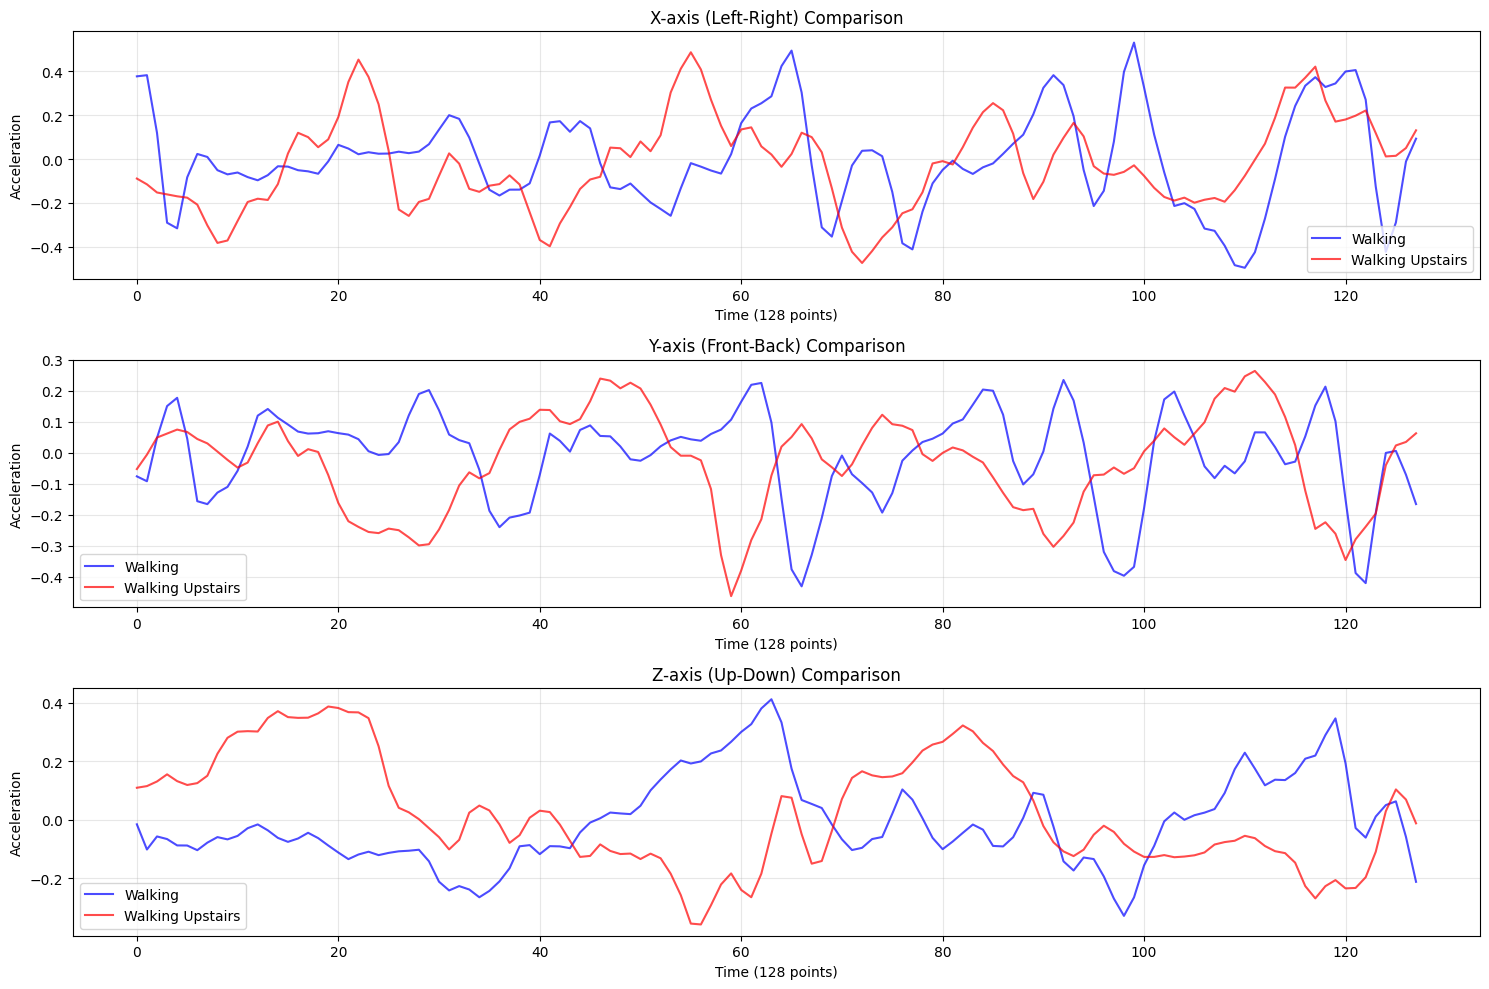

In [25]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(15, 10))

# x축, y축, z축 각각 비교
axes = ['X-axis (Left-Right)', 'Y-axis (Front-Back)', 'Z-axis (Up-Down)']
walking_data = [walking_x, walking_y, walking_z]
upstairs_data = [upstairs_x, upstairs_y, upstairs_z]

for i in range(3):
    plt.subplot(3, 1, i+1)

    # 걷기 데이터
    plt.plot(walking_data[i], label='Walking', color='blue', alpha=0.7)

    # 계단 오르기 데이터
    plt.plot(upstairs_data[i], label='Walking Upstairs', color='red', alpha=0.7)

    plt.title(f'{axes[i]} Comparison')
    plt.xlabel('Time (128 points)')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



##  **가설 vs 실제 결과 정리**

###  **실험 조건**
- 비교 대상: 걷기 vs 계단 오르기 (뛰기 데이터 없어서 대체)
- 스마트폰 위치: 허리 왼쪽
- 데이터: body_acc (중력 제거된 순수 움직임)

---

###  **가설 1: 걷기 vs 계단 오르기**

**예측**:
> "앞뒤(y축)랑 상하(z축)에서 차이가 클 것. 뛰면 충격이 크니까 상하랑 다리 움직임 정도면 앞뒤"

**실제 결과**:

| 축 | 예측 | 결과 | 검증 |
|---|---|---|---|
| **Y축(앞뒤)** | ✅ 차이 있을 것 | **큰 차이 확인!** 범위 +9% 증가, 시각화에서 뚜렷한 패턴 차이 | **✅ 정확!** |
| **Z축(상하)** | ✅ 차이 있을 것 | **미묘한 차이** 범위 +0.7% 증가, 하지만 패턴은 다름 | **△ 부분적 정확** |
| **X축(좌우)** | 예측 안함 | **의외의 차이** 서로 다른 균형 패턴 발견 | **➕ 보너스 발견!** |

---

###  **주요 발견**

**맞은 부분**:
- **Y축(앞뒤)**에서 계단 오르기의 뚜렷한 움직임 증가
- 계단에서 "앞으로 힘차게 나아가는" 특징 정확히 예측

**예상과 다른 부분**:
- Z축(상하)의 차이가 생각보다 작음
- 하지만 패턴을 보면 계단 초반에 "지속적인 상승" 특징 발견

**새로운 통찰**:
- 단순 "충격의 크기"보다는 "움직임의 패턴"이 더 중요
- X축도 의외로 활동 구분에 유용할 수 있음
